<b>EdNet - Optimize Student Performance: Data Wrangling</b><p>
EdNet contains data from 700,000+ students (users).<p>
Each user has 4 related csv files (KT1,KT2, KT3, KT4). <p>
First, merge the 4 csv files into a single tall dataframe. <p>
Then, save the new dataframe preceeded by an underscore '_' , denoting that it has been processed.

In [1]:
# I get by with a little help from my friends
import numpy as np
import pandas as pd
import glob

In [2]:
cd ~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-KT4/KT4

C:\Users\Prem\Desktop\SPRINGBOARD_MASTER\EdNet\data\raw\EdNet-KT4\KT4


In [3]:
# file locations
prefix = '~/Desktop/SPRINGBOARD_MASTER/EdNet/data/raw/EdNet-'
folder_1 = prefix + 'KT1/KT1/'
folder_2 = prefix + 'KT2/KT2/'
folder_3 = prefix + 'KT3/KT3/'
folder_4 = prefix + 'KT4/KT4/'
questions = prefix + 'Contents/contents/questions.csv'
questions_df = pd.read_csv(questions)

# create a list of the csv files in current directory
csv_files = glob.glob('*.csv')

In [4]:
# count of csv files in current directory
print(len(csv_files))

298047


In [5]:
# loop: create pandas dataframe
# extract user_id from filename and assign user_id as value to column[0], 'user_id'

z = 1243

for i in range(1):
        KT1 = pd.read_csv(folder_1 + csv_files[z])
        KT1.insert(0, 'user_id', csv_files[z].split('.')[0])

        KT2 = pd.read_csv(folder_2 + csv_files[z]) 
        KT2.insert(0, 'user_id', csv_files[z].split('.')[0])

        KT3 = pd.read_csv(folder_3 + csv_files[z])
        KT3.insert(0, 'user_id', csv_files[z].split('.')[0])

        KT4 = pd.read_csv(folder_4 + csv_files[z])
        KT4.insert(0, 'user_id', csv_files[z].split('.')[0])
    
        # MERGE
        df = KT1.merge(KT2, on='timestamp', how='outer')\
            .merge(KT3, on='timestamp', how='outer')\
            .merge(KT4, on='timestamp', how='outer')
        
        # convert timestamp column to datetime
        df.timestamp = pd.to_datetime(df['timestamp'], unit='ms')
        
        # drop_duplicates
        df = df.drop_duplicates(subset=['timestamp'], keep='last')
        
        # subset columns 
        df = df[['user_id_x','timestamp','solving_id','question_id','user_answer_x','elapsed_time',\
          'action_type_x','item_id_x','source_x','platform_x','cursor_time']]
        df = df.iloc[:,[0,2,3,4,6,7,8,9,10,11,12]]
                        
        # cleanup column names
        columns = ['user_id','timestamp','solving_id','question_id','user_answer','elapsed_time',\
          'action_type','item_id','source','platform', 'cursor_time']
        df.columns = columns
        
        # convert 'elapsed_time' from ms to seconds
        df.elapsed_time = df.elapsed_time.div(1000)
        
        # cleanup values by slicing the leading letter
        df.user_id = df.user_id.str.split('u')[1][1]
        df.user_id = df.user_id.astype('int64')
        df.question_id = df.question_id.str.slice(start=1)
        
        #df.question_id = df.question_id.fillna(0).astype(int)

        # EXPORT csv create a csv of the new dataframe
        output = '_'+ str(csv_files[z])
        df.to_csv(output, index=False)
        
        z+=1

df.head()

,user_id,timestamp,solving_id,question_id,user_answer,elapsed_time,action_type,item_id,source,platform,cursor_time
0,11976,2019-07-19 09:29:58.985,1.0,5955,NaN,25.0,NaN,NaN,NaN,NaN,NaN
1,11976,2019-07-19 09:30:23.571,2.0,1184,NaN,17.0,NaN,NaN,NaN,NaN,NaN
2,11976,2019-07-19 09:31:03.518,3.0,5200,NaN,36.0,NaN,NaN,NaN,NaN,NaN
3,11976,2019-07-19 09:31:30.086,4.0,5365,NaN,22.0,NaN,NaN,NaN,NaN,NaN
4,11976,2019-07-19 09:31:56.490,5.0,5296,NaN,23.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes 

user_id                  int64
timestamp       datetime64[ns]
solving_id             float64
question_id             object
user_answer             object
elapsed_time           float64
action_type             object
item_id                 object
source                  object
platform                object
cursor_time            float64
dtype: object

[2487, 2487, 568, 568, 333, 568, 815, 815, 815, 815, 468]


Text(0.5, 1.0, 'Non-Null Values')

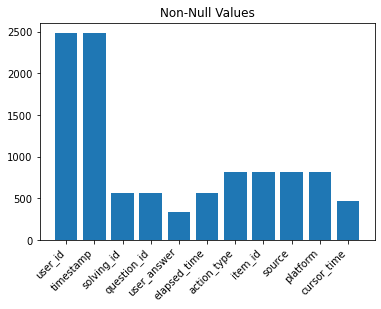

In [7]:
# plot Non-Null Values per column
hey = '_u' + str(df.iloc[:,0].values[0])
newb = pd.read_csv(hey + '.csv')

newlist = []
for i in range(newb.shape[1]):
    newlist.append(newb.iloc[:,i].notnull().sum())
print(newlist)

import matplotlib.pyplot as plt
plt.bar(newb.columns, newlist)
plt.xticks(rotation=45, ha="right")
plt.title('Non-Null Values')

## GRADING / SCORING
"""# inner join dataframes on 'question_id' columns
        df = pd.merge(left=df, right=questions_df, left_on='question_id', right_on='question_id')

        # create a 'correct' column
        df['correct'] = 0

        # loop - if user answers == correct answer, then df1['correct'][_]= 1
        length_df = df['user_id'].count()
        count = 0
        for i in range(length_df):
            if df['user_answer'][count] == df['correct_answer'][count]:
                df['correct'][count] = 1
            count+=1
            
        # create new 'score' column = sum of rows/ sum of correct (1)
        total_u1 = df['correct'].count()
        correct_u1 = df[df['correct'] == 1].count()
        score = correct_u1[0]/total_u1
        df['score'] = score"""